## What is Linear Programming?

Linear programming deals with the maximization (or minimization) of a linear objective function, subject to linear constraints, where all the decision variables are continuous. That is, no discrete variables are allowed. The linear objective and constraints must consist of linear expressions.

## What is a linear expression?

A linear expression is a scalar product. 
$$\sum a_ix_i$$

$a_i$ represents constants and $x_i$ represents variables/unknowns

The expression can also be written in shortform
$$AX$$

$A$ is a vector of constants and $X$ is a vector of variables

Note: Nonlinear terms that involve variables (such as x and y) are not allowed in linear expressions. Terms that are not allowed in linear expressions include

- multiplication of two or more variables (such as x times y),
- quadratic and higher order terms (such as x squared or x cubed),
- exponents,
- logarithms,
- absolute values.

## What is a linear constraint?

Linear constraints are expressed as inequalities

- linear_expression $=$ linear_expression
- linear_expression $\leq$ linear_expression
- linear_expression $\geq$ linear_expression

Any linear constraint can be rewritten as one or two expressions of the type linear expression is less than or equal to zero.

Note that strict inequality operators (that is,  >  and  < ) are not allowed in linear constraints.

## What is a continuous variable?

A variable (or decision variable) is an unknown of the problem. Continuous variables are variables the set of real numbers (or an interval).

Restrictions on their values that create discontinuities, for example a restriction that a variable should take integer values, are not allowed.

## Symbolic representation of an LP

A typical symbolic representation of LP is as follows


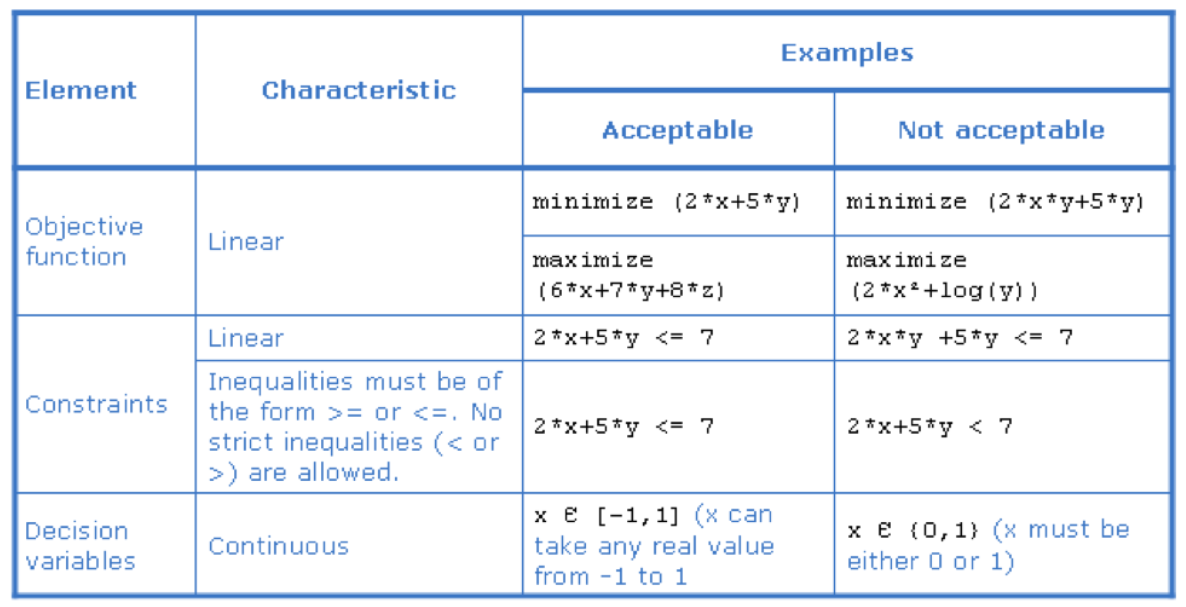

## Characteristics of a linear program

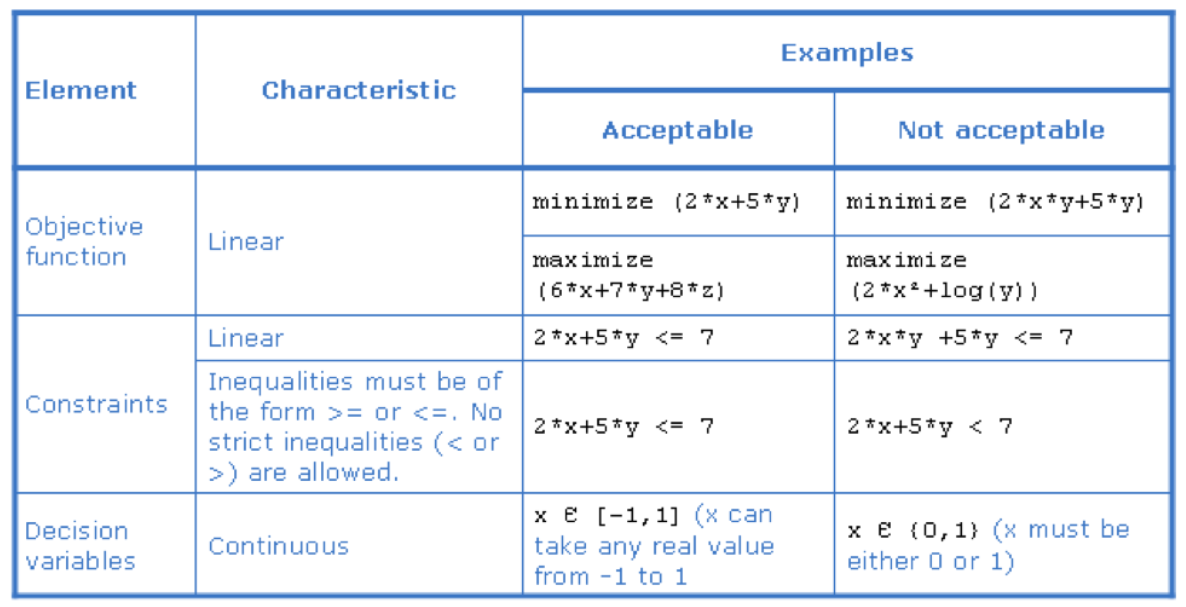

## Example: a production problem

In this topic, you’ll analyze a simple production problem in terms of decision variables, the objective function, and constraints.
You’ll learn how to write an LP formulation of this problem, and how to construct a graphical representation of the model. You’ll also learn what feasible, optimal, infeasible, and unbounded mean in the context of LP

### Problem description: telephone production

A telephone company produces and sells two kinds of telephones, namely desk phones and cellular phones.

Each type of phone is assembled and painted by the company. The objective is to maximize profit, and the company has to produce at least 100 of each type of phone.

There are limits in terms of the company’s production capacity, and the company has to calculate the optimal number of each type of phone to produce, while not exceeding the capacity of the plant

### Writing a descriptive model

It is good practice to start with a descriptive model before attempting to write a mathematical model. In order to come up with a descriptive model, you should consider what the decision variables, objectives, and constraints for the business problem are, and write these down in words.

In order to come up with a descriptive model, consider the following questions:

- What are the decision variables?
- What is the objective?
- What are the constraints?

### Telephone production: a descriptive model

A possible descriptive model of the telephone production problem is as follows:

Decision variables:
    - Number of desk phones produced (DeskProduction)
    - Number of cellular phones produced (CellProduction)
Objective: Maximize profit

Constraints:
    - The DeskProduction should be greater than or equal to 100.
    - The CellProduction should be greater than or equal to 100.
    - The assembly time for DeskProduction plus the assembly time for CellProduction should not exceed 400 hours.
    - The painting time for DeskProduction plus the painting time for CellProduction should not exceed 490 hours.
    
### Writing a mathematical model
Convert the descriptive model into a mathematical model:

- Use the two decision variables DeskProduction and CellProduction
- Use the data given in the problem description (remember to convert minutes to hours where appropriate)
- Write the objective as a mathematical expression
- Write the constraints as mathematical expressions (use “=”, “<=”, or “>=”, and name the constraints to describe their purpose)
- Define the domain for the decision variables

### Telephone production: a mathematical model
To express the last two constraints, we model assembly time and painting time as linear combinations of the two productions, resulting in the following mathematical model

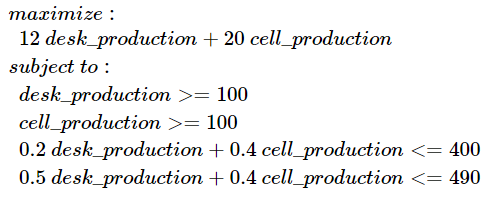

### Using DOcplex to formulate the mathematical model in Python
Use the DOcplex Python library to write the mathematical model in Python. This is done in four steps:

- create a instance of docplex.mp.Model to hold all model objects
- create decision variables,
- create linear constraints,
- finally, define the objective.
- But first, we have to import the class Model from the docplex module.

## Step 1: Download the library

First install docplex if needed.

In [2]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

## Step 2: Set up the prescriptive engine

- Subscribe to our private cloud offer or Decision Optimization on Cloud solve service here if you do not want to use a local solver.
- Get the service URL and your personal API key and enter your credentials here if accurate:

In [3]:
url = None
key = None

## Step 3: Set up the prescriptive model

Create the model

All objects of the model belong to one model instance.

In [4]:
# first import the Model class from docplex.mp
from docplex.mp.model import Model

# create one model instance, with a name
m = Model(name='telephone_production')

#### Define the decision variables

- The continuous variable desk represents the production of desk telephones
- The continuous variable cell represents the production of cell phones

In [5]:
# By default, all variables in the docplex has a lower bound of 0 and an infinite upper bound

desk = m.continuous_var(name='desk')
cell = m.continuous_var(name='cell')

#### Set up the constraints

- Desk and cell phone must both be greater than 100
- Assembly time is limited
- Painting time is limited.

In [6]:
# write constraints
# constraint #1: desk production is greater than 100

m.add_constraint(desk >= 100)

# constraint #2: cell production is greater than 100
m.add_constraint(cell >= 100)

# constraint #3: assembly time limit

ct_assembly = m.add_constraint(0.2 * desk + 0.4 * cell <= 400)

# constraint #4: paiting time limit

ct_painting = m.add_constraint(0.5 * desk + 0.4 * cell <= 490)

#### Express objective

We want to maximize expected revenue

In [7]:
m.maximize(12 * desk + 20 * cell)

#### Print information about the model
We can print information about the model to see how many objects of each type it holds:

In [8]:
m.print_information()

Model: telephone_production
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 4
   - linear=4
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


#### Solve with the Decision Optimization solve service
If url and key are None, the Modeling layer will look for a local runtime, otherwise will use the credentials.

Look at the documentation for a good understanding of the various solving/generation modes.

If you're using a Community Edition of CPLEX runtimes, depending on the size of the problem, the solve stage may fail and will need a paying subscription or product installation

In [9]:
# Solve and print the solution

s = m.solve()

In [10]:
m.print_solution()

objective: 20600.000
  desk=300.000
  cell=850.000


CPLEX solver has found optimal solution (desk, cell) = (300, 850) at the extreem point of the feasible region

#### Feasible set of solutions

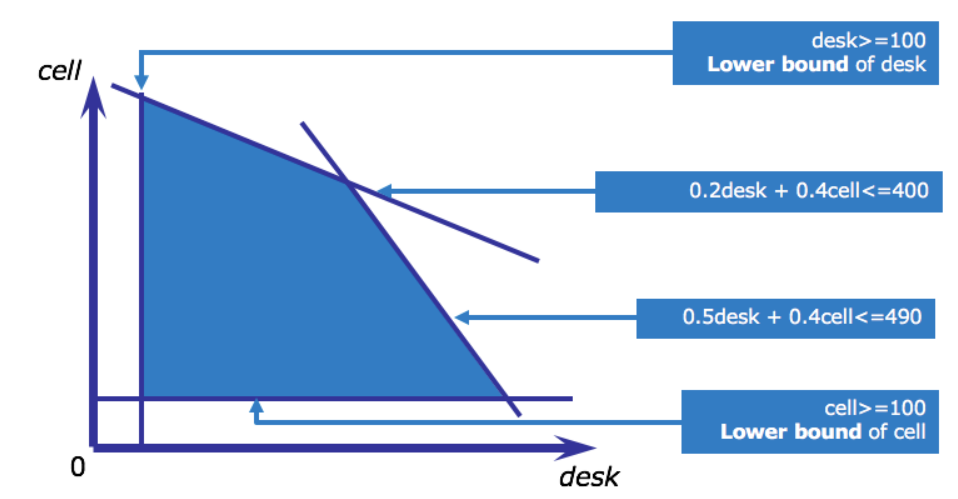

#### Multiple solutions

Multiple optimal solutions can be found by CPLEX solver if slope of objective function is same as slope/line defining thne constraints.

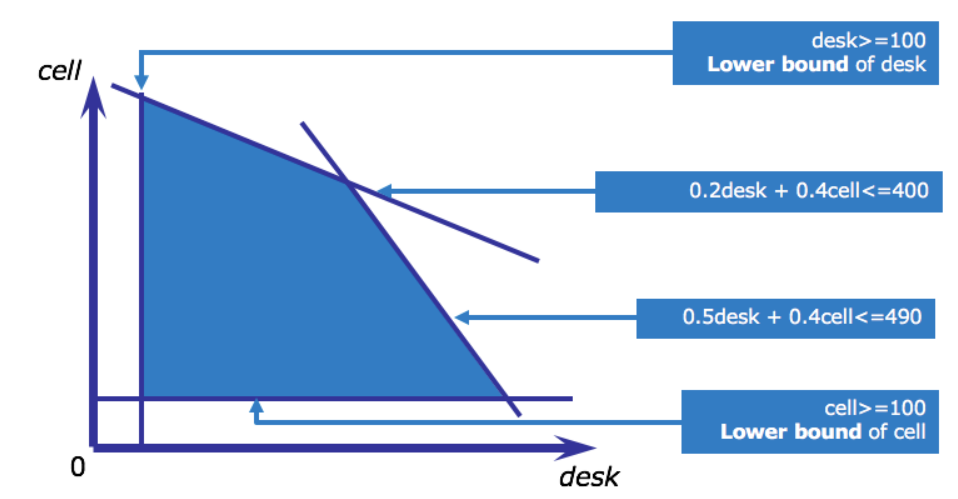

#### Binding and Non-binding constraints

Binding constraints are constraints whose solution values are an equality. Pictorially, This means that when solution values are plugged in the constraints. The equality contraints is satisfied.

Solution values: desk=300.000, cell=850.000

For assembly time limit: 0.2*desk + 0.4*cell <= 400; 0.2(300) + 0.4(850) = 400 . Thus it is binding constraint

For painting time limit: 0.5*desk + 0.4*cell <= 490; 0.5(300) + 0.4(850) = 490. Thus it is binding constraint

For desk production: desk >= 100; desk = 300; since $300 \neq 100$. Thus it is a non-binding constraint

For cell production: cell >= 100; cell= 850; since $850 \neq 100$. Thus it is a non-binding constraint

#### Infeasibility

A model is infeasible when no solution exists within the specified constraints. this could be a result of incorrect model or data. Also, even if the model and data are correct, it may be in conflict with the real-world system being modeled.

It is kind of knotty to get the reasons behind the infeasibility of the model. However, Docplex can help provide ways to recognise the source of the infeasibility. IF there is no solution __Model.solve()__ gives _None_

A key exaple using the Telephone production model is to enter desk >= 100

In [11]:
# create a new model, copy of m

im = m.copy()

# get the 'desk' variable of the new model from its name

idesk = im.get_var_by_name('desk')

# add a new (infeasible) constraint

im.add_constraint(idesk >= 1100);

# solve the new proble, we expect a result of None as the model is now infeasible

ims = im.solve()

if ims is None:
    print('Solution is infeasible')

Solution is infeasible


DOcplex can provide source of infeasibility by recommending relaxation of constraints. Relaxation involves changing the values of the RHS of the contraints

For example, relaxation of assembly time as follows, 0.2desk + 0.4cell <= 440... in this case changing time from 400 to 440

There are basically 2 kinds of constraints:

#### Hard and soft contraints:
- Hard constraints have been experienced typically so far. Definitionally, cannot be violated under any circumstances

Example
$0.2*desk + 0.4*cell \leq 440$ 

- Soft constraints can be violated under some circumstances

Example:

$0.2*desk + 0.4*cell \leq 440 + overtime$  if the hard limit is set $overtime <= 400$

Finally, add an additional cost to the objective to penalize use of overtime.

Assume that in this case overtime costs an additional $2/hour, then the new objective becomes:

$maximize$   $12*desk + 20*cell — 2*overtime$

#### Implement soft constraint model using DOcplex

Add extra variable $overtime$ and cap the upper bound at 40. This is enough to set the hard limit constraint

In [12]:
overtime = m.continuous_var(name='overtime', ub=40)

Add overtime to RHS of the ct_assembly constraint

Note: this operation modifies the model by performing a side-effect on the constraint object. DOcplex allows dynamic edition of model elements.

In [13]:
ct_assembly.rhs = 400 + overtime

Last, modify the objective expression to add the penalization term. Note that we use the Python decrement operator

In [14]:
m.maximize(12 * desk + 20* cell - 2 * overtime)

In [15]:
s = m.solve()

In [16]:
m.print_solution()

objective: 22253.333
  desk=166.667
  cell=1016.667
  overtime=40.000


### Unbounded Variable vs. Unbounded model

A variable is __unbounded__ if one or both of its bounds are infinite in nature.

A model on the otherhand is __unbounded__ if objective function can be increased/decreased ad-infinitum.

__Infeasibility__ implies constraints are too limiting. While Model unboundedness implies missing constraints/ constraints with low restriction.

#### Unbounded feasible region

FOr the telephone production problem, the model can be unbounded if we exclude constraints on assembly time and painting time. This leads to the increase of the objective function to infinity since there is no longer a finite upper bound in the feasible region. THe figure below illutrates it.

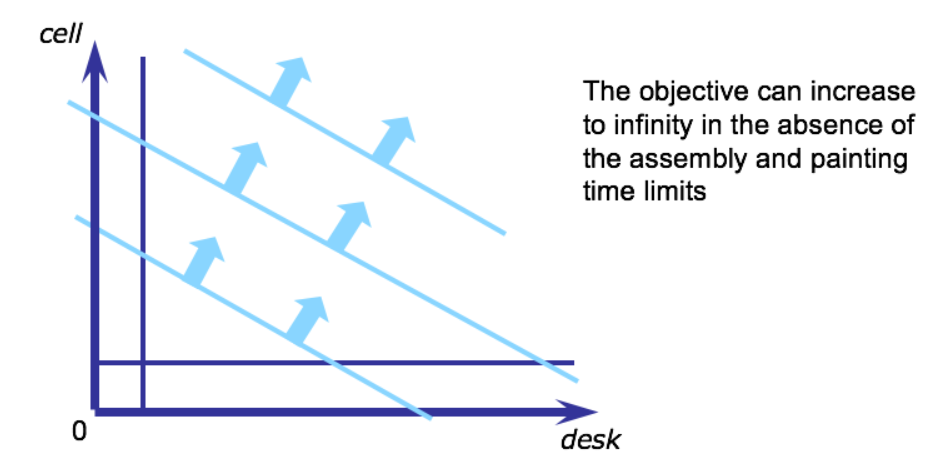



## Algorithms for solving LPs
The IBM® CPLEX® Optimizers to solve LP problems in CPLEX include:

- Simplex Optimizer
- Dual-simplex Optimizer
- Barrier Optimizer


#### The dual of a LP

The concept of duality is important in linear programming. Every LP problem has an associated LP problem known as its dual. The dual of this associated problem is the original LP problem (known as the primal problem). If the primal problem is a minimization problem, then the dual problem is a maximization problem and vice versa.

Important notes for __primal-dual__ pair

- Each constraint in the primal has an associated dual variable, yi.
- Any feasible solution to D is an upper bound to P, and any feasible solution to P is a lower bound to D.
- In LP, the optimal objective values of D and P are equivalent, and occurs where these bounds meet.
- The dual can help solve difficult primal problems by providing a bound that in the best case equals the optimal solution to the primal problem

#### Dual prices
In any solution to the dual, the values of the dual variables are known as the dual prices, also called shadow prices.

For each constraint in the primal problem, its associated dual price indicates how much the dual objective will change with a unit change in the right hand side of the constraint.

The dual price of a non-binding constraint is zero. That is, changing the right hand side of the constraint will not affect the objective value.

The dual price of a binding constraint can help you make decisions regarding the constraint.

For example, the dual price of a binding resource constraint can be used to determine whether more of the resource should be purchased or not.

#### The dual simplex algorithm
The simplex algorithm works by finding a feasible solution and moving progressively toward optimality.

The dual simplex algorithm implicitly uses the dual to try and find an optimal solution to the primal as early as it can, and regardless of whether the solution is feasible or not.

It then moves from one vertex to another, gradually decreasing the infeasibility while maintaining optimality, until an optimal feasible solution to the primal problem is found.

In CPLEX, the Dual-simplex Optimizer is the first choice for most LP problems.

### Basic solutions and basic variables

$Basic solutions$ are solutions of the LP problem found at the vertex.

$Basic variables$ are the variables that are not set to zero by the algorithm upon iterations. The values set to zero are called $non-basic variables$. 

## Reduced cost
Reduced cost of a variable helps to define how much the objective function changes with a unit change in variable.

minimize:
$c^tx$

s.t:

$Ax = b$;
$x \geq 0$

If  y  represents the dual variables for a given basic solution, then the reduced costs are defined as:

$$c−y^tA$$
 
Such a basic solution is optimal if:

$$c−y^tA≥0$$
 
If all reduced costs for this LP are non-negative, it follows that the objective value can only increase with a change in the variable value, and therefore the solution (when minimizing) is optimal.

DOcplex lets you access reduced costs of variable, after a successful solve. Let's experiment with the two decision variables of our problem:

##### Getting reduced cost values with DOcplex

DOcplex lets you access reduced costs of variable, after a successful solve. Let's experiment with the two decision variables of our problem:

In [18]:
print('Reduced cost of desk variable: {}'.format(desk.reduced_cost))
print('Reduced cost of cell variable: {}'.format(cell.reduced_cost))

Reduced cost of desk variable: 0
Reduced cost of cell variable: 0


### Default optimality criteria for CPLEX optimizer

CPLEX optimizer operates on finite precision computers. It uses an optimality tolerance to test the reduced cost. The default optimal tolerance is $-1\times10^{-6}$. Optimality tolerance can be adjusted if it is taking long for the algorithm long to converge and solution is sufficiently closed to optimality.

### Reduced Costs and multiple optimal solutions
In the earlier example you saw how one can visualize multiple optimal solutions for an LP with two variables. For larger LPs, the reduced costs can be used to determine whether multiple optimal solutions exist. Multiple optimal solutions exist when one or more non-basic variables with a zero reduced cost exist in an optimal solution (that is, variable values that can change without affecting the objective value). In order to determine whether multiple optimal solutions exist, you can examine the values of the reduced costs with DOcplex.

### Slack values
For any solution, the difference between the left and right hand sides of a constraint is known as the slack value for that constraint.

For example, if a constraint states that f(x) <= 100, and in the solution f(x) = 80, then the slack value of this constraint is 20.

In the earlier example, you learned about binding and non-binding constraints. For example, f(x) <= 100 is binding if f(x) = 100, and non-binding if f(x) = 80.

The slack value for a binding constraint is always zero, that is, the constraint is met exactly.

You can determine which constraints are binding in a solution by examining the slack values with DOcplex.

This might help to better interpret the solution and help suggest which constraints may benefit from a change in bounds or a change into a soft constraint

#### Accessing slack values with DOcplex
As an example, let's examine the slack values of some constraints in our problem, after we revert the change to soft constraints

In [ ]:
# revert soft constraints
ct_assembly.rhs = 440
s3 = m.solve(url=url, key=key)

# now get slack value for assembly constraint: expected value is 40
print('* slack value for assembly time constraint is: {0}'.format(ct_assembly.slack_value))
# get slack value for painting time constraint, expected value is 0.
print('* slack value for painting time constraint is: {0}'.format(ct_painting.slack_value))

In [19]:
# revert soft constraints
ct_assembly.rhs = 440
s = m.solve()

In [20]:
m.print_solution()

objective: 22333.333
  desk=166.667
  cell=1016.667


In [21]:
# now get slack value for assembly constraint: expected value is 0

print('Slack variable for assembly time constraint: {}'.format(ct_assembly.slack_value))

# get slack value for painting time constraint, expected value is 0

print('Slack variable for painting time constraint: {}'.format(ct_painting.slack_value))

Slack variable for assembly time constraint: 0
Slack variable for painting time constraint: 0


#### Degeneracy
It is possible that multiple non-optimal solutions with the same objective value exist.

As the simplex algorithm attempts to move in the direction of an improved objective value, it might happen that the algorithm starts cycling between non-optimal solutions with equivalent objective values. This is known as degeneracy.

Modern LP solvers, such as CPLEX Simplex Optimizer, have built-in mechanisms to help escape such cycling by using perturbation techniques involving the variable bounds.

If the default algorithm does not break the degenerate cycle, it's a good idea to try some other algorithms, for example the Dual-simplex Optimizer. Problem that are primal degenerate, are often not dual degenerate, and vice versa.

##### Setting a LP algorithm with DOcplex
Users can change the algorithm by editing the lpmethod parameter of the model. We won't go into details here, it suffices to know this parameter accepts an integer from 0 to 6, where 0 denotes automatic choice of the algorithm, 1 is for primal simplex, 2 is for dual simplex, and 4 is for barrier...

For example, choosing the barrier algorithm is done by setting value 4 to this parameter. We access the parameters property of the model and from there, assign the lpmethod parameter

In [24]:
m.parameters.lpmethod = 4
m.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_LPMethod                                4
CPXPARAM_RandomSeed                              201903125
Tried aggregator 1 time.
LP Presolve eliminated 2 rows and 1 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.02 sec. (0.00 ticks)
Parallel mode: using up to 8 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 8
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops to factor    = 5
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   9.2499384e+03  -3.2000000e+03  1.14e-13  0.00e+00  6.60e+01  1.00e+00
   1   1.7917626e+04   1.0558388e+04  1.61e-13  0.00e+00  1.77e+01  8.

docplex.mp.solution.SolveSolution(obj=22333.3,values={desk:166.667,cell:..